In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [17]:
# load the ribbon data
# parameters
efield = 0.1
nk = 801
nwann = 56
nfilling_per_uc = 36
ribbon_width = 25
eigvals_all, ks = [], []
eigvecs_sel = []

fermilevel_shift = 0.03

with h5py.File(f"./data/ribbon_efield{efield}.hdf5", 'r') as f:
    bands_chosen = f["bands_chosen"][()]
    for ik in np.arange(nk):
        ks.append(f[f"ik{ik}/k"][()])
        eigvals_all.append(f[f"ik{ik}/eigvals"][()])
        eigvecs_sel.append(f[f"ik{ik}/eigvecs_bands_selected"][()])
    
ks = np.array(ks)
eigvals_all = np.array(eigvals_all)  # (nk, nbands_tot)
eigvecs_sel = np.array(eigvecs_sel)  # (nk, norb, bands_selected)

# get the projection of each eigenvec onto the first and last unit cell
psi2 = eigvecs_sel * eigvecs_sel.conj()

# the indices of the orbitals of the initial and the final cell
celli_up_indx = np.arange(0,nwann,2)
celli_dn_indx = np.arange(1,nwann,2)
proj_celli_up = np.sum(psi2[:,celli_up_indx,:], axis=1)
proj_celli_dn = np.sum(psi2[:,celli_dn_indx,:], axis=1)

In [18]:
# find the Fermi level
def find_efermi(eigvals_all, nelec_tot):
    eigvals_all_sorted = np.sort(eigvals_all.flatten())
    vbm = eigvals_all_sorted[nelec_tot - 1]
    cbm = eigvals_all_sorted[nelec_tot]
    return 0.5 * (vbm + cbm)


nelec_tot = nfilling_per_uc * ribbon_width * nk
efermi = find_efermi(eigvals_all, nelec_tot) + fermilevel_shift

# reference: bulk efermi = 2.382502 (see "generate_pdos.ipynb in old repo")
print(f"ribbon efermi = {efermi}")

# shift all the eigenvales by efermi
eigvals_all -= efermi

ribbon efermi = 3.0660579662024428


(-0.5, 0.5)

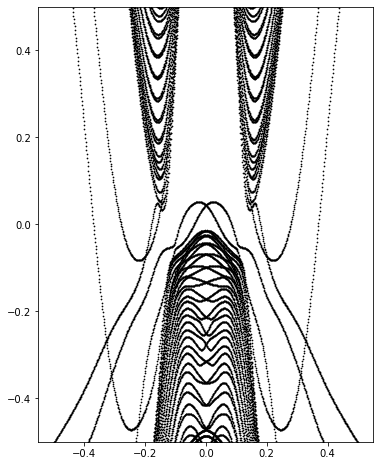

In [19]:
# just plot the dispersion
fig, ax = plt.subplots(1,1,figsize=(6,8))
for ibb, ib in enumerate(bands_chosen):
    ax.scatter(ks[:,0], eigvals_all[:,ib],c='k', s=0.5)

ax.set_ylim([-0.5, 0.5])

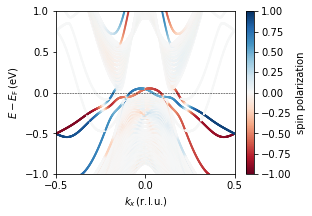

In [20]:
# now plot the bands structure for the ribbon,
# with the colors indicating how much the states are projected onto the edges
fig, ax = plt.subplots(1,1,figsize=(4,3))

proj_celli_spin = proj_celli_up - proj_celli_dn

for ibb, ib in enumerate(bands_chosen):
    # plot the bands with the color indicating the proj_celli
    ax.scatter(ks[:,0], eigvals_all[:,ib], c=proj_celli_spin[:,ibb].real, cmap='RdBu', s=1, vmax=1, vmin=-1)


ax.set_xlim(ks.min(), ks.max())
ax.set_xticks([ks.min(), 0, ks.max()])
ax.set_xlabel(r"$k_x\,$(r.l.u.)")

ax.set_ylim(-1, 1)
ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_ylabel(r"$E-E_{\mathrm{F}}\,$(eV)")

ax.axhline(0, color='k', lw=0.5, ls='--')

# customize the colorbar    
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(-1, 1))
sm.set_array([])
fig.colorbar(sm, ax=ax, label="spin polarization")
fig.savefig(f"./figures/ribbon_efield{efield}_w{ribbon_width}_bands.png", dpi=360, bbox_inches='tight')

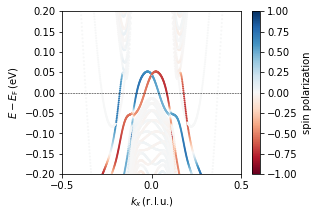

In [21]:
# now plot the bands structure for the ribbon,
# with the colors indicating how much the states are projected onto the edges
fig, ax = plt.subplots(1,1,figsize=(4,3))

proj_celli_spin = proj_celli_up - proj_celli_dn

for ibb, ib in enumerate(bands_chosen):
    # plot the bands with the color indicating the proj_celli
    ax.scatter(ks[:,0], eigvals_all[:,ib], c=proj_celli_spin[:,ibb].real, cmap='RdBu', s=1, vmax=1, vmin=-1)


ax.set_xlim(ks.min(), ks.max())
ax.set_xticks([ks.min(), 0, ks.max()])
ax.set_xlabel(r"$k_x\,$(r.l.u.)")

ax.set_ylim(-0.2, 0.2)
# ax.set_yticks(np.arange(-1, 1.5, 0.5))
ax.set_ylabel(r"$E-E_{\mathrm{F}}\,$(eV)")

ax.axhline(0, color='k', lw=0.5, ls='--')

# customize the colorbar    
sm = plt.cm.ScalarMappable(cmap='RdBu', norm=plt.Normalize(-1, 1))
sm.set_array([])
fig.colorbar(sm, ax=ax, label="spin polarization")